### Imports

In [1]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [2]:
import sktime
from sktime import datasets
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import ReducedRegressionForecaster
from sktime.utils.plotting import plot_series
import numpy as np
import pandas as pd

In [3]:
from sktime.forecasting.compose import RecursiveRegressionForecaster


In [4]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression


In [5]:
from sktime.performance_metrics.forecasting import smape_loss
import matplotlib.pyplot as plt


In [6]:
# step 1: data loading
airline = datasets.load_airline()


In [7]:
airline.head()


Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [8]:
y_train,y_test=temporal_train_test_split(airline,test_size=36)

In [9]:
fh=list(range(1,37)) # forecasting horizan

In [10]:
listOfRegressors=[LinearRegression(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),SVR()]

In [11]:
list_of_smape=[]
for regressor in listOfRegressors:
    reduced_reg=ReducedRegressionForecaster(regressor=regressor,window_length=10)
    reduced_reg.fit(y_train)
    y_pred=reduced_reg.predict(fh)
    list_of_smape.append(smape_loss(y_test,y_pred))

In [12]:
list_of_smape

[0.13640640534470172,
 0.13640380075477362,
 0.13598444445592425,
 0.1359418499446778,
 0.40216036610048744,
 0.18255602509745505,
 0.19760478607359225,
 0.5466688695301318]

### Linear Regression

In [13]:
reduced_reg=ReducedRegressionForecaster(regressor=LinearRegression(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
    

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

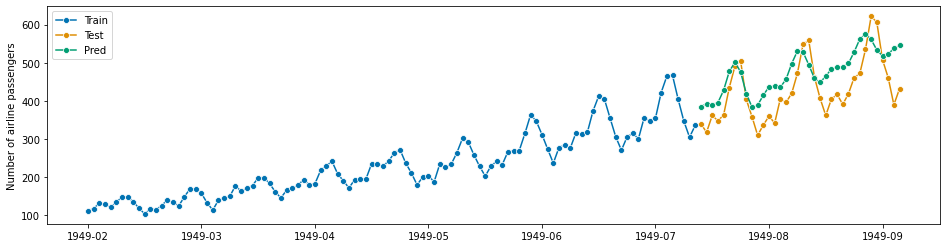

In [14]:
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### Ridge Regression

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

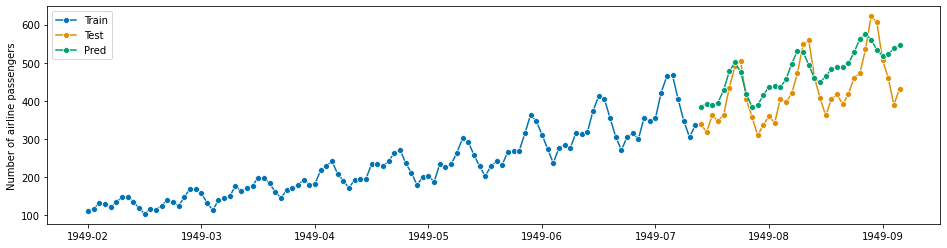

In [15]:
reduced_reg=ReducedRegressionForecaster(regressor=Ridge(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### Lasso Regression

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

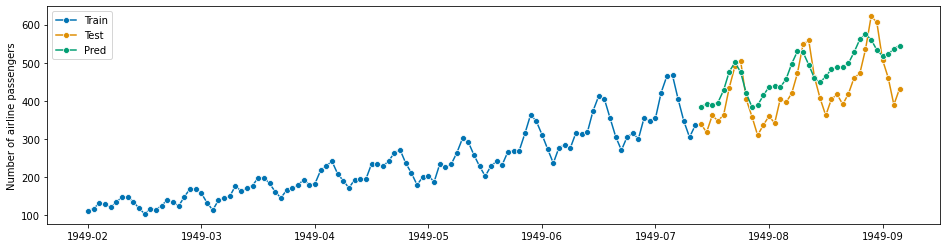

In [16]:
reduced_reg=ReducedRegressionForecaster(regressor=Lasso(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### ElasticNet

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

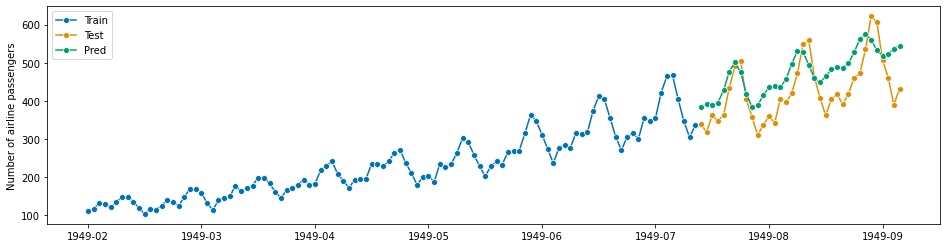

In [17]:
reduced_reg=ReducedRegressionForecaster(regressor=ElasticNet(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### DecisionTreeRegressor

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

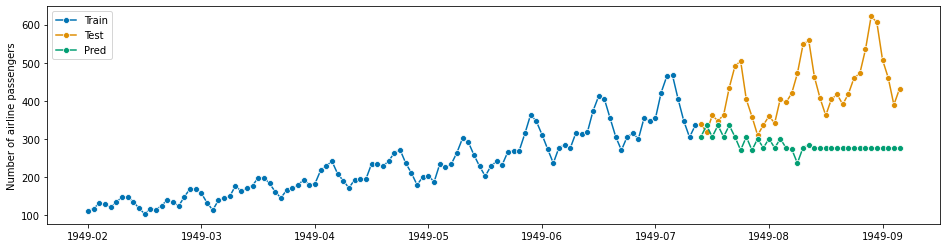

In [18]:
reduced_reg=ReducedRegressionForecaster(regressor=DecisionTreeRegressor(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### RandomForestRegressor

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

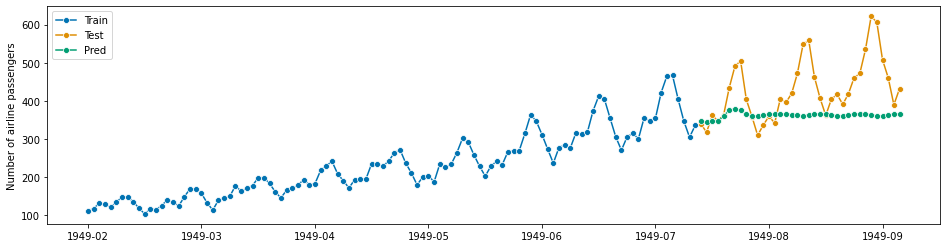

In [19]:
reduced_reg=ReducedRegressionForecaster(regressor=RandomForestRegressor(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### KNeighborsRegressor

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

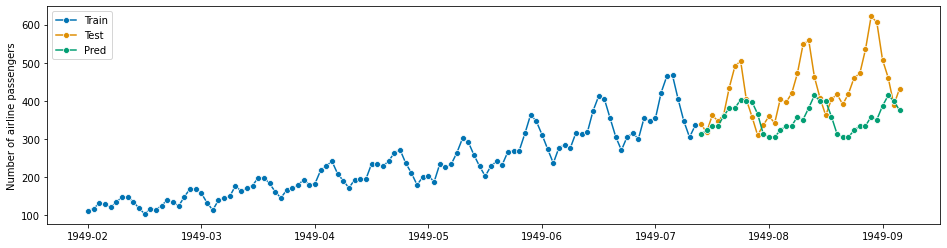

In [20]:
reduced_reg=ReducedRegressionForecaster(regressor=KNeighborsRegressor(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])

### SVR

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

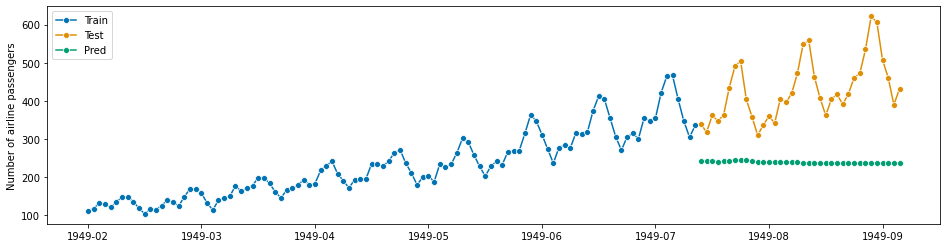

In [21]:
reduced_reg=ReducedRegressionForecaster(regressor=SVR(),window_length=10)
reduced_reg.fit(y_train)
y_pred=reduced_reg.predict(fh)
plot_series(y_train,y_test,y_pred, labels=["Train","Test","Pred"])